<a href="https://colab.research.google.com/github/siwookim1114/Data-Science-Projects/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터 분석

## 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd
import seaborn as sns


In [ ]:
# 파일 경로 설정
train_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/titanic_train.csv"
test_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/titanic_test.csv"

# pd.read_csv() 사용
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# 결과 확인하기
print(df_train)
print("-" * 80)
print(df_test)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
# df.info() --> 행과 컬럼에 대한 요약 정보를 출력하는 함수
df_train.info()
print("-" * 80)
df_test.info()

# 지금은 똑같은 파일이 두개로(train, test) 분리되어있음 => 병합해서 하나로 만들어도 됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

In [ ]:
### 데이터 병합하기
df = pd.concat([df_train, df_test], ignore_index = True)   ## 다 컬럼들이 공통된 컬럼이니깐 y축 방향으로 (axis = 0 기본 디폴트) 로 병합
print(df)
print("-" * 80)
df.info()

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

## 데이터 전처리

### 누락 데이터 처리

In [ ]:
### 각 컬럼별 누락 데이터의 수 확인

# isnull().sum() 사용
num_nulls = df.isnull().sum()
print(f"각 컬럼별 누락 데이터의 수 : \n{num_nulls}")

각 컬럼별 누락 데이터의 수 : 
PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


#### cabin 컬럼

In [ ]:
### Cabin 컬럼은 제거 (너무 누락된 데이터가 많아서 써먹을 방법이 없음) --> df.drop() 을 통해서 원하는 컬럼 삭제
cleaned_df = df.drop(columns = ["Cabin"])
print(f"Cabin 컬럼을 제거한 결과 : \n{cleaned_df}")

Cabin 컬럼을 제거한 결과 : 
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                            

#### Age 컬럼

In [ ]:
### Age 컬럼 값의 분포 --> 요약 통계량 추출
print(cleaned_df.loc[:, "Age"].describe())

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


In [ ]:
### Age 컬럼 --> 나이별 빈도수 --> 최빈값 (mode) 확인
counts = cleaned_df.loc[:, "Age"].value_counts()   ### value_counts()로도 mode 확인가능
print(f"Age 컬럼의 나이별 승객 수 : \n{counts}")
print("-" * 80)
print(f"Age 컬럼의 나이별 승객의 수 top10 : \n{counts.iloc[:10]}")
print("-" * 80)
print(f"Age 컬럼의 나이별 승객의 수 top1 : \n{counts.index[0]}")

Age 컬럼의 나이별 승객 수 : 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64
--------------------------------------------------------------------------------
Age 컬럼의 나이별 승객의 수 top10 : 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
25.0    34
28.0    32
36.0    31
29.0    30
27.0    30
Name: count, dtype: int64
--------------------------------------------------------------------------------
Age 컬럼의 나이별 승객의 수 top1 : 
24.0


In [ ]:
### Age 컬럼 --> 누락 데이터 --> 최빈값으로 대체
cleaned_df.loc[:, "Age"].fillna(counts.index[0], inplace = True)

# 최빈 값으로 대체 후 누락 데이터 수 확인
num_nulls = cleaned_df.loc[: , "Age"].isnull().sum()
print(f"Age 컬럼의 누락 데이터의 수 : {num_nulls}")

Age 컬럼의 누락 데이터의 수 : 0


##### Binning

In [ ]:
### Age 컬럼 --> 8단계 구간화

# 매개 변수에 전달할 값 (arguments)
x = cleaned_df.loc[:, "Age"]
bins = 8    ## 총 8등분으로 구간화
labels = [0, 1, 2, 3, 4, 5, 6, 7]     ## 이런 숫자 구간으로 나이를 대신함

# pd.cut() 함수 사용
cleaned_df.loc[:, "Age"] = pd.cut(x = x, bins = bins, labels = labels)   ## 실제 나이를 구간화 해서 구간으로 채운다 (실제 나이는 신뢰성이 떨어져서 버림)

# 결과 확인하기
print(f"데이터프레임 확인 : \n{cleaned_df}")

데이터프레임 확인 : 
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   3      1   
2                                Heikkinen, Miss. Laina  female   2      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   3      1   
4                              Allen, Mr. William Henry    male   3      0   
...                                               

#### Embarked 컬럼

In [ ]:
### 승선 항구의 항구별 빈도수 / 비율 추출

# 빈도수 추출
counts = cleaned_df.loc[:, "Embarked"].value_counts()
print(f"승선 항구의 항구별 빈도수 : \n{counts}")

print("-" * 80)

# 비율 추출
ratio = cleaned_df.loc[:, "Embarked"].value_counts(normalize = True)   ## normalize = True 하면 비율로 표시
print(f"승선 항구별 비율 : \n{ratio}")

승선 항구의 항구별 빈도수 : 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64
--------------------------------------------------------------------------------
승선 항구별 비율 : 
Embarked
S    0.699311
C    0.206580
Q    0.094109
Name: proportion, dtype: float64


In [ ]:
### 최빈 값으로 승선 항구에 대한 누락 데이터 처리
#(누락 데이터가 2개 밖에 안되서 가장 비율이 높은 S로 채워도 전체적인 통계에는 영향 X)
cleaned_df.loc[:, "Embarked"].fillna("S", inplace = True)  ## inplace = True 로 그대로 똑같은 데이터프레임에 덮어 씌우기

# 결과 확인하기 --> 누락 데이터의 수 확인
num_nulls = cleaned_df.loc[:, "Embarked"].isnull().sum()
print(f"Embarked 컬럼의 누락 데이터의 수 : \n{num_nulls}")

## 결과가 0이 나오므로 누락 데이터는 채워짐
## 통계적으로 근거가 가장 확실하게 있는 값으로 NA 값을 채운다

Embarked 컬럼의 누락 데이터의 수 : 
0


#### Fare 컬럼

In [ ]:
### Fare 컬럼의 항목별 빈도수 확인
counts = cleaned_df.loc[:, "Fare"].value_counts()  ## 누락 데이터의 수 : 1 명 => 1308 명 중에서
print(f"요금의 금액별 빈도수 : \n{counts}")

요금의 금액별 빈도수 : 
Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64


In [ ]:
### Fare 컬럼에서 누락 데이터 확인 --> 1명 who?

# Fare 컬럼 --> 누락 여부 --> isnull() --> 누락인 행 True / 누락이 아닌 행 False (isnull()은 비교 연산자처럼 쓸 수 있음)
condition = cleaned_df.loc[:, "Fare"].isnull()    ## Fare 컬럼에서 누락인지 아닌지, True인 행만 찾음
print(f"Fare 컬럼에서 누락 여부를 확인한 결과 : \n{condition}")

print("-" * 80)

# 불리언 인덱싱 --> loc[row, :]
data_null = cleaned_df.loc[condition, :]      ## 그 누락된 행의 다른 콜롬 정보 다 추출
print(f"누락 데이터가 있는 승객의 이름 : \n{data_null}")

Fare 컬럼에서 누락 여부를 확인한 결과 : 
0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1309, dtype: bool
--------------------------------------------------------------------------------
누락 데이터가 있는 승객의 이름 : 
      PassengerId  Survived  Pclass                Name Gender Age  SibSp  \
1043         1044         0       3  Storey, Mr. Thomas   male   6      0   

      Parch Ticket  Fare Embarked  
1043      0   3701   NaN        S  


In [ ]:
### 3등석 & 성별 "Male" & 나이 구간 6 (60 - 70) & 승선 항구 S & SipSp 0 & Parch 0   => 이런 조건을 만족하는 승객의 요금 확인
## Fare이 NA 값인 승객의 다른 정보들이 확인이 되니 그 정보들이랑 최대한 겹치는 다른 승객의 Fare 값을 확인하면 됨

# 조건식 생성
condition1 = (cleaned_df.loc[:, "Pclass"] == 3)
condition2 = (cleaned_df.loc[:, "Gender"] == "male")
condition3 = (cleaned_df.loc[:, "Age"] == 6)
condition4 = (cleaned_df.loc[:, "Embarked"] == "S")
condition5 = (cleaned_df.loc[:, "SibSp"] == 0)
condition6 = (cleaned_df.loc[:, "Parch"] == 0)

# 위에 조건들을 모두 교집합 한 최종 condition
condition = condition1 & condition2 & condition3 & condition4 & condition5 & condition6

# 6가지 조건을 만족하는 행 에서 요금 컬럼 추출 (요금만 궁금함) ==> Fare 추출
fare = cleaned_df.loc[condition, "Fare"]
print(f"6가지 조건을 모두 만족하는 승객의 요금 : \n{fare}")

## 6가지 조건을 모두 만족하는 승객을 찾았을때 2명밖에 안됨 (Na 값 승객 한명이랑 다른 승객 한명)

6가지 조건을 모두 만족하는 승객의 요금 : 
326     6.2375
1043       NaN
Name: Fare, dtype: float64


In [ ]:
### 누락 데이터 대체
price = fare.iloc[0] ## 아까 두 승객중 첫번째 iloc[0] 값으로 채우면됨
cleaned_df.loc[:, "Fare"].fillna(price, inplace = True)

# 결과 확인하기
print(cleaned_df.iloc[data_null.index, :])   ## data_null.index 로 그 Na값의 승객 행의 인덱스를 불러옴

      PassengerId  Survived  Pclass                Name Gender Age  SibSp  \
1043         1044         0       3  Storey, Mr. Thomas   male   6      0   

      Parch Ticket    Fare Embarked  
1043      0   3701  6.2375        S  


### Feature Engineering

#### 가족 인원수 컬럼 추가

In [ ]:
### SipSp 컬럼 값과 Parch 컬럼 값 --> 덧셈 --> 가족 인원수 컬럼 생성 --> 파생 변수 (기존 컬럼을 가지고 가공해서 새로운 컬럼으로 만듬 ==> 모델의 성능이 올라갈수도 있음)
## 파생 변수를 잘만드면 데이터의 가치를 높일 수 있음

# SibSp 컬럼 값과 Parch 컬럼 값 --> 덧셈
sum = cleaned_df.loc[:, "SibSp"] + cleaned_df.loc[:, "Parch"]   ## 두 컬럼이 똑같이 행 숫자를 가지고 있어서 그냥 같이 더해주면 됨
print(f"SibSp 컬럼과 Parch 컬럼의 덧셈 결과 : \n{sum}")

print("-" * 80)

# 가족 인원수 컬럼 --> 값 입력
# 새로 컬럼 이름 하나 만들어서 지정 후 거기에 데이터 값 넣어주면 새로 만들어짐 (마치 딕셔너리 dict["key"] = value 처럼)
cleaned_df.loc[:, "num_family"] = sum

# 결과 확인하기
print(cleaned_df)


SibSp 컬럼과 Parch 컬럼의 덧셈 결과 : 
0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Length: 1309, dtype: int64
--------------------------------------------------------------------------------
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   3      1   
2                                Heikkinen, Miss. 

#### Name 컬럼 세분화

In [ ]:
### Name 컬럼 확인하기
"""
### 이름의 구성 : 성, 호칭. 이름      ## Name 컬럼에 승객들의 이름 형식은 이렇게 되어있음
"""

# Name 컬럼의 값 확인
print(cleaned_df.loc[:, "Name"])

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object


In [ ]:
### "호칭" 추출 --> .split()

"""
### split() 함수
(예시)
name = "Braund, Mr. Owen Harris"
name.split(" ")
"""

# test name 생성
test_name = cleaned_df.loc[:, "Name"].iloc[0]
print(test_name)

# 첫번째 분할 --> 기준 : ',' (쉼표)
result1 = test_name.split(',')    ## 스플릿 해서 조각으로 자르고 리스트에 저장함
print(f"첫번째 분할의 결과 : {result1}")

print("-" * 80)

# 두번째 분할 --> 기준 : '.' (마침표)
#result2 = result1[1].split('.')
result2 = test_name.split(',')[1].split(".")
print(f"두번째 분할의 결과 : {result2}")

print("-" * 80)

# '호칭' 추출
#title = result2[0]
title = test_name.split(",")[1].split(".")[0]
print(f"추출한 호칭 확인 : {title}")

Braund, Mr. Owen Harris
첫번째 분할의 결과 : ['Braund', ' Mr. Owen Harris']
--------------------------------------------------------------------------------
두번째 분할의 결과 : [' Mr', ' Owen Harris']
--------------------------------------------------------------------------------
추출한 호칭 확인 :  Mr


In [ ]:
### 문자열의 앞/뒤 공백 제거 --> strip() 함수

# 예시
string = "    Hello World, Python!"
print(f"strip 함수 사용 전 문자열 확인 : {string}")
print("-" * 80)
result = string.strip()
print(f"strip 함수 사용 후 문자열 확인 : {result}")

print("-" * 80)

# 추출된 호칭에 strip 함수 적용
# title1 = title.strip()
title1 = test_name.split(",")[1].split(".")[0].strip()
print(title1)

strip 함수 사용 전 문자열 확인 :     Hello World, Python!
--------------------------------------------------------------------------------
strip 함수 사용 후 문자열 확인 : Hello World, Python!
--------------------------------------------------------------------------------
Mr


In [ ]:
### Name 컬럼 --> 호칭 추출 함수 정의
def extract_title(name):
  # ","로 split --> 두번째 성분 원소 선택 --> '.'로 split --> 첫번째 성분 원소 선택 --> strip 함수
  title = name.split(",")[1].split(".")[0].strip()
  return title

In [ ]:
### Name 컬럼으로부터 호칭을 추출 --> 새로운 컬럼 --> 파생 변수 생성
'''
# 호칭 정리
  1) 'Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir' : 직위 표현
  2) 'Ms', 'Mme', 'Mrs', 'Dona' : 여성 표현
  3) 'Miss', 'Mlle', 'Lady' : 젊은 여성 표현
  4) 'Mr', 'Don' : 남성 표현
  5) 'Master' : 주로 청소년 이하 결혼하지 않은 남성
  6) 'Jonkheer', 'the Countess' : 귀족 표현
'''

# Name 컬럼 --> extract_title 적용 --> 호칭 추출 --> 새로운 컬럼 생성
title = cleaned_df.loc[:, "Name"].apply(extract_title)   ## for-문 이런거 필요없이 그냥 정의한 함수 하나 가지고 apply() 해버리면 쭉 모든 행에 대해서 다 추출됨
print(f"호칭 추출의 결과 : \n{title}")

print("-" * 80)

# title 컬럼 생성 + 추출된 호칭 입력
cleaned_df.loc[:, "title"] = title
# 결과 확인하기
print(f"title 컬럼 추가 후 데이터프레임 확인 : \n{cleaned_df}")

호칭 추출의 결과 : 
0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object
--------------------------------------------------------------------------------
title 컬럼 추가 후 데이터프레임 확인 : 
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs

#### title 컬럼 정리

In [ ]:
### title 컬럼의 항목별 빈도수 / 비율 확인

# 빈도수 추출
counts = cleaned_df.loc[:, "title"].value_counts()
print(f"title 컬럼의 호칭별 빈도수 확인 : \n{counts}")

print("-" * 80)

# 비율 추출
ratio = cleaned_df.loc[:, "title"].value_counts(normalize = True)
print(f"title 컬럼의 호칭별 비율 확인 : \n{ratio}")


title 컬럼의 호칭별 빈도수 확인 : 
title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64
--------------------------------------------------------------------------------
title 컬럼의 호칭별 비율 확인 : 
title
Mr              0.578304
Miss            0.198625
Mrs             0.150497
Master          0.046600
Rev             0.006112
Dr              0.006112
Col             0.003056
Mlle            0.001528
Major           0.001528
Ms              0.001528
Lady            0.000764
Sir             0.000764
Mme             0.000764
Don             0.000764
Capt            0.000764
the Countess    0.000764
Jonkheer        0.000764
Dona            0.000764
Name: proportion, dtype:

In [ ]:
### Series --> Index 확인 --> "호칭" 추출
row_index = counts.index
print(f"행 인덱스 확인 : \n{row_index}")


행 인덱스 확인 : 
Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle', 'Major',
       'Ms', 'Lady', 'Sir', 'Mme', 'Don', 'Capt', 'the Countess', 'Jonkheer',
       'Dona'],
      dtype='object', name='title')


In [ ]:
### title 컬럼에서 Mr 또는 Miss 또는 Mrs 또는 Master가 아닌 값 -> Other로 변환

# 데이터프레임 복사
df_test = cleaned_df.copy()    ## 원본 변형을 막으려면 .copy()를 써야됨

#1. replace() 함수 사용 --> 호칭 변환
df_test.loc[:, "title"].replace({row_index[4] : "other",
                                    row_index[5] : "other",
                                    row_index[6] : "other",
                                    row_index[7] : "other",
                                    row_index[8] : "other",
                                    row_index[9] : "other",
                                    row_index[10] : "other",
                                    row_index[11] : "other",
                                    row_index[12] : "other",
                                    row_index[13] : "other",
                                    row_index[14] : "other",
                                    row_index[15] : "other",
                                    row_index[16] : "other",
                                    row_index[17] : "other"}, inplace = True)

# 결과 확인하기 : df_test -> title 컬럼 --> 호칭별 빈도수
counts = df_test.loc[:, "title"].value_counts()
print(f"호칭 변환 후 title 컬럼의 호칭별 빈도수 : \n{counts}")



호칭 변환 후 title 컬럼의 호칭별 빈도수 : 
title
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64


In [ ]:
print(cleaned_df.loc[:, "title"].value_counts)

<bound method IndexOpsMixin.value_counts of 0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: title, Length: 1309, dtype: object>


In [ ]:
### title 컬럼에서 Mr 또는 Miss 또는 Mrs 또는 Master가 아닌 값 -> Other로 변환(2)

# 비교 연산자 이용 --> 불리언 배열 생성
condition1 = (cleaned_df.loc[:, "title"] != "Mr")
condition2 = (cleaned_df.loc[:, "title"] != "Mrs")
condition3 = (cleaned_df.loc[:, "title"] != "Miss")
condition4 = (cleaned_df.loc[:, "title"] != "Master")

condition = condition1 & condition2 & condition3 & condition4    ## 네가지 조건의 교집합
print(f"4가지 조건을 모두 만족하는 경우 확인 : \n{condition}")

print("-" * 80)

# 비교 연산자의 결과 --> 불리언 인덱싱 --> other로 수정
cleaned_df.loc[condition, "title"] = "other"    ## other로 수정

# 결과 확인하기 -> title 컬럼의 항목별 빈도수 추출
counts = cleaned_df.loc[:, "title"].value_counts()
print(f"title 컬럼의 항목별 빈도수 : \n{counts}")

4가지 조건을 모두 만족하는 경우 확인 : 
0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: title, Length: 1309, dtype: bool
--------------------------------------------------------------------------------
title 컬럼의 항목별 빈도수 : 
title
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64


### 불필요한 컬럼 삭제

In [ ]:
cleaned_df.info()  ## 전체적으로 개요를 다 볼 수 있음 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Gender       1309 non-null   object  
 5   Age          1309 non-null   category
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Embarked     1309 non-null   object  
 11  num_family   1309 non-null   int64   
 12  title        1309 non-null   object  
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 124.5+ KB


In [ ]:
### 삭제의 대상 : PassengerId, Name, Ticket, Embarked
df = cleaned_df.drop(columns = ["PassengerId", "Name", "Ticket", "Embarked"])   ## 이 콜롬들은 불필요함

# 결과 확인하기
print(df)

      Survived  Pclass  Gender Age  SibSp  Parch      Fare  num_family   title
0            0       3    male   2      1      0    7.2500           1      Mr
1            1       1  female   3      1      0   71.2833           1     Mrs
2            1       3  female   2      0      0    7.9250           0    Miss
3            1       1  female   3      1      0   53.1000           1     Mrs
4            0       3    male   3      0      0    8.0500           0      Mr
...        ...     ...     ...  ..    ...    ...       ...         ...     ...
1304         0       3    male   2      0      0    8.0500           0      Mr
1305         1       1  female   3      0      0  108.9000           0   other
1306         0       3    male   3      0      0    7.2500           0      Mr
1307         0       3    male   2      0      0    8.0500           0      Mr
1308         0       3    male   2      1      1   22.3583           2  Master

[1309 rows x 9 columns]


### 결과 저장하기

In [ ]:
### 정제한 데이터를 csv 파일로 저장하기

# 파일 경로 설정
file_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/titanic_cleaned.csv"   ##새로운 csv파일로 저장 (titanic_cleaned)

# df.to_csv() 함수 사용
df.to_csv(file_path, index = False)

In [ ]:
### 저장된 결과 불러오기

# 필요한 라이브러리 임폴트
import pandas as pd

# 파일 경로 설정
file_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/titanic_cleaned.csv"

# pd.read_csv()
# loaded_df = pd.read_csv(file_path)
df = pd.read_csv(file_path)
# print(loaded_df)
print(df)

      Survived  Pclass  Gender  Age  SibSp  Parch      Fare  num_family  \
0            0       3    male    2      1      0    7.2500           1   
1            1       1  female    3      1      0   71.2833           1   
2            1       3  female    2      0      0    7.9250           0   
3            1       1  female    3      1      0   53.1000           1   
4            0       3    male    3      0      0    8.0500           0   
...        ...     ...     ...  ...    ...    ...       ...         ...   
1304         0       3    male    2      0      0    8.0500           0   
1305         1       1  female    3      0      0  108.9000           0   
1306         0       3    male    3      0      0    7.2500           0   
1307         0       3    male    2      0      0    8.0500           0   
1308         0       3    male    2      1      1   22.3583           2   

       title  
0         Mr  
1        Mrs  
2       Miss  
3        Mrs  
4         Mr  
...      

### 데이터 탐색

In [ ]:
# 경고 메시지 제어 모듈
import warnings

# 경고 메시지 처리 함수 호출 --> "무시" 하도록 설정
warnings.filterwarnings("ignore")   ## 어떤 경고 사항이 발생하면 걔를 무시함

In [ ]:
### 시각화 관련 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

#### Survived 컬럼

In [ ]:
### 사망자 수 / 생존자 수 통계 분석

# 빈도수 추출
counts = df.loc[:, "Survived"].value_counts()
print(f"사망자 / 생존자 빈도수 : \n{counts}")

print("-" * 80)

# 비율 추출
ratio = df.loc[:, "Survived"].value_counts(normalize = True)
print(f"사망자 / 생존자 비율 : \n{ratio}")

사망자 / 생존자 빈도수 : 
Survived
0    815
1    494
Name: count, dtype: int64
--------------------------------------------------------------------------------
사망자 / 생존자 비율 : 
Survived
0    0.622613
1    0.377387
Name: proportion, dtype: float64


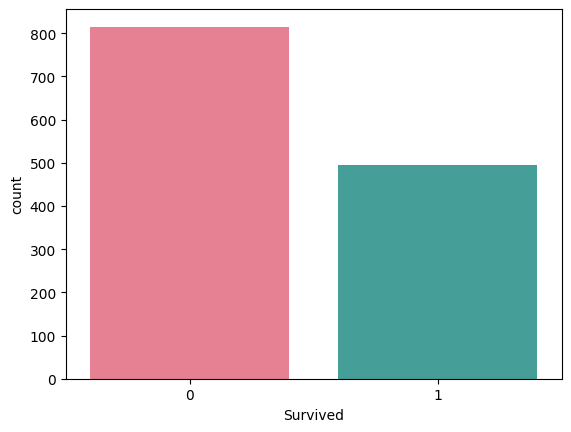

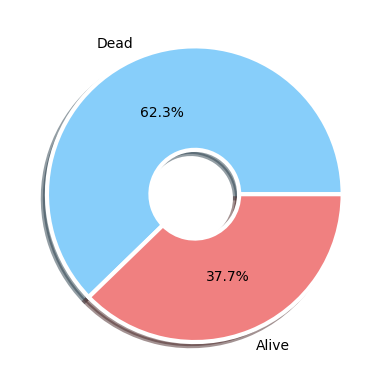

In [ ]:
### 사망자 / 생존자 분포 시각화

## 범주형 데이터의 항목별 빈도수 시각화 --> 막대 그래프, 원 그래프

# 막대 그래프
sns.countplot(data = df, x = "Survived", palette = "husl")
plt.show()

# 원 그래프
wedge_size = ratio.values    ## ratio.values 쓰면 배열안에 1차원으로 값이 담김
colours = ["lightskyblue", "lightcoral"]
labels = ["Dead", "Alive"]
wedgeprops = {"width" : 0.7, "edgecolor" : "white", "linewidth" : 3}

plt.pie(x = wedge_size, labels = labels, colors = colours, autopct = "%.1f%%", shadow = True, wedgeprops = wedgeprops)
plt.show()



#### 생존 여부와 승객의 등급 분석

In [ ]:
### 탑승객의 등급 통계 분석

# 승객의 등급별 빈도수 추출
counts = df.loc[:, "Pclass"].value_counts()
print(f"탑승객의 등급별 빈도수 : \n{counts}")

print("-" * 80)

# 승객의 등급별 비율
ratio = df.loc[:, "Pclass"].value_counts(normalize = True)
print(f"탑승객의 등급별 비율 : \n{ratio}")

탑승객의 등급별 빈도수 : 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64
--------------------------------------------------------------------------------
탑승객의 등급별 비율 : 
Pclass
3    0.541635
1    0.246753
2    0.211612
Name: proportion, dtype: float64


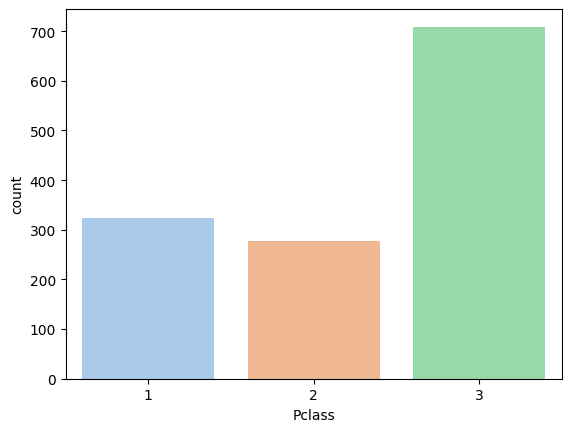

In [ ]:
### 탑승객의 등급 분포 시각화

# 범주형 데이터 --> 항목별 빈도수 --> 막대 그래프
sns.countplot(data = df, x = "Pclass", palette = "pastel")
plt.show()

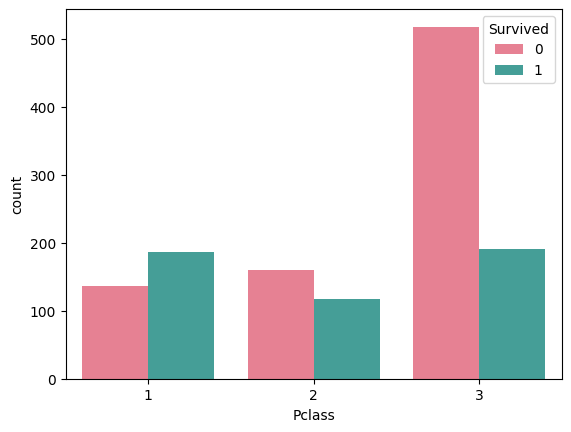

In [ ]:
### Survived 컬럼과 Pclass 컬럼의 관계 분석
sns.countplot(data = df, x = "Pclass", hue = "Survived", palette = "husl")   ## 등급별로 생존과 사망이 어떻게 차이가 나는지
plt.show()

# 결과: 전체 62.3% 사망에 37.7% 생존인데 그 62.3% 안에서도 3 등석에 있던 승객들이 제일 많이 죽었다. => 좌석등급과 생존과 연관성이 있음

In [ ]:
### 승객 등급별 생존자 / 사망자 빈도수와 통계 분석

## 1등석 --> 사망자 / 생존자 통계 분석

# 빈도수 분석
condition1 = df.loc[:, "Pclass"] == 1     ## 탑승객의 선실 등급이 1등급에 속하는 row들만 다 추출해서 뽑아냄
# print(condition1)
pclass1_survived_counts = df.loc[condition1, "Survived"].value_counts()  ## 1등석인 승객들의 생존 여부 빈도수 (비율) 추출
print(f"1등석 탑승객 중 사망자 / 생존자 빈도수 : \n{pclass1_survived_counts}")

print("-" * 80)

# 비율 분석
pclass1_survived_ratio = df.loc[condition1, "Survived"].value_counts(normalize = True)  ## 빈도수를 비율로 변환
print(f"1등석 탑승객 중 사망자 / 생존자 비율 : \n{pclass1_survived_ratio}")

print("-" * 80)

## 2등석 --> 사망자 / 생존자 통계 분석

# 빈도수 분석
condition2 = df.loc[:, "Pclass"] == 2  ## 탑승객의 선실 등급이 2등급에 속하는 row들만 다 추출해서 뽑아냄
pclass2_survived_counts = df.loc[condition2, "Survived"].value_counts()
print(f"2등석 탑승객 중 사망자 / 생존자 빈도수 : \n{pclass2_survived_counts}")

print("-" * 80)

# 비율 분석
pclass2_survived_ratio = df.loc[condition2, "Survived"].value_counts(normalize = True) ## 빈도수를 비율로 변환
print(f"2등석 탑승객 중 사망자 / 생존자 비율 : \n{pclass2_survived_ratio}")

print("-" * 80)

## 3등석 --> 사망자 / 생존자 통계 분석

# 빈도수 분석
condition3 = df.loc[:, "Pclass"] == 3  ## 탑승객의 선실 등급이 3등급에 속하는 row들만 다 추출해서 뽑아냄
pclass3_survived_counts = df.loc[condition3, "Survived"].value_counts()
print(f"3등석 탑승객 중 사망자 / 생존자 빈도수 : \n{pclass3_survived_counts}")

print("-" * 80)

# 비율 분석
pclass3_survived_ratio = df.loc[condition3, "Survived"].value_counts(normalize = True) ## 빈도수를 비율로 변환
print(f"3등석 탑승객 중 사망자 / 생존자 비율 : \n{pclass3_survived_ratio}")




1등석 탑승객 중 사망자 / 생존자 빈도수 : 
Survived
1    186
0    137
Name: count, dtype: int64
--------------------------------------------------------------------------------
1등석 탑승객 중 사망자 / 생존자 비율 : 
Survived
1    0.575851
0    0.424149
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
2등석 탑승객 중 사망자 / 생존자 빈도수 : 
Survived
0    160
1    117
Name: count, dtype: int64
--------------------------------------------------------------------------------
2등석 탑승객 중 사망자 / 생존자 비율 : 
Survived
0    0.577617
1    0.422383
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
3등석 탑승객 중 사망자 / 생존자 빈도수 : 
Survived
0    518
1    191
Name: count, dtype: int64
--------------------------------------------------------------------------------
3등석 탑승객 중 사망자 / 생존자 비율 : 
Survived
0    0.730606
1    0.269394
Name: proportion, dtype: float64


#### 생존 여부와 성별의 관계 부석

In [ ]:
### 전체 탑승객 성별 통계 분석

# 성별 빈도수 추출
counts = df.loc[:, "Gender"].value_counts()   ## 총 탑승객들의 성별 추출
print(f"Gender 컬럼의 남녀 빈도수 : \n{counts}")

print("-" * 80)

# 성별 비율 추출
ratio = df.loc[:, "Gender"].value_counts(normalize = True)  ## 빈도수를 비율로 변환
print(f"Gender 컬럼의 남녀 비율 : \n{ratio}")

Gender 컬럼의 남녀 빈도수 : 
Gender
male      843
female    466
Name: count, dtype: int64
--------------------------------------------------------------------------------
Gender 컬럼의 남녀 비율 : 
Gender
male      0.644003
female    0.355997
Name: proportion, dtype: float64


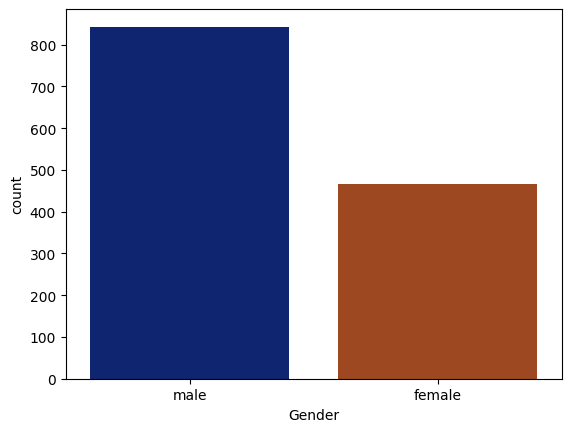

--------------------------------------------------------------------------------


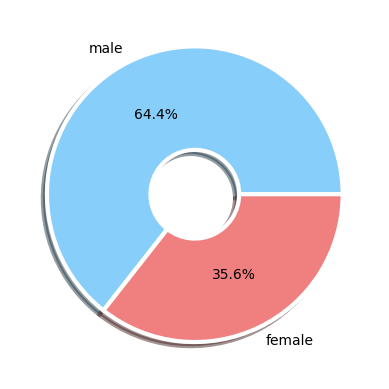

In [ ]:
### 전체 탑승객 성별 빈도수 통계 시각화

# 빈도수 --> 막대 그래프
sns.countplot(data = df, x = "Gender", palette = "dark")    ## 수직 막대 그래프로 빈도수를 x축에 gender에 대해서 y 축 빈도수 표시
plt.show()

print("-" * 80)

# 비율 --> 원 그래프
## Seaborn 에서는 원그래프를 제공 안함 (matplotlib 에서 제공하는 pie 함수로만 가능)

## ratio가 중복으로 여러셀에 있을 경우 가장 최신 (마지막 셀)에서 지정한 값이 됨 (Gender)
wedge_size = ratio.values      ## ratio에 있는 비율이 .values를 통해서 1차원 배열안에 값이 저장이 됨
colors = ["lightskyblue", "lightcoral"]
labels = ["male", "female"]
wedgeprops = {"width" : 0.7, "edgecolor" : "white", "linewidth" : 3}

plt.pie(x = wedge_size, labels = labels, colors = colors, autopct = "%.1f%%", wedgeprops = wedgeprops, shadow = True)
plt.show()


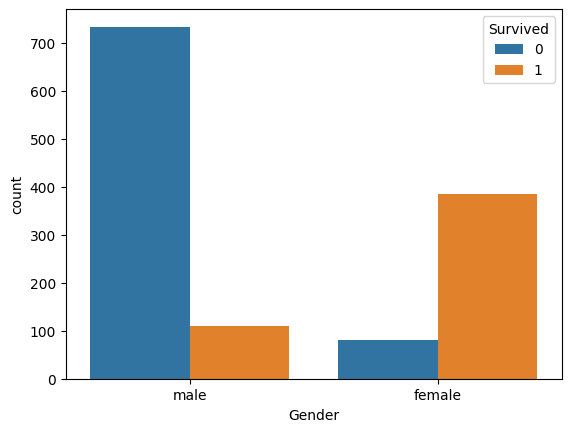

In [ ]:
### Survived 컬럼과 Gender 컬럼의 관계 분석
sns.countplot(data = df, x = "Gender", hue = "Survived")  ## hue = "Survived"를 넣어줘서 남녀의 생존 비율을 분석
plt.show()


In [ ]:
### 성별 생존자 / 사망자  통계 분석

## 여성 생존자 / 사망자 통계 분석

# 빈도수 분석
condition1 = df.loc[:, "Gender"] == "female"    ## 탑승객들 중 성별이 여성인 승객들만 추출
female_survived_counts = df.loc[condition1, "Survived"].value_counts()   ## 여성 중 사망 / 생존 빈도수 추출
print(f"여성 중 사망자/ 생존자 수 : \n{female_survived_counts}")

print("-" * 80)

# 비율 분석
female_survived_ratio = df.loc[condition1, "Survived"].value_counts(normalize = True)  ## 빈도수 비율로 변환
print(f"여성 중 사망자 / 생존자 비율 : \n{female_survived_ratio}")

print("-" * 80)

## 남성 생존자 / 사망자 통계 분석

# 빈도수 분석

condition2 = df.loc[:, "Gender"] == "male"    ## 탑승객들 중 성별이 남성인 승객들만 추출
male_survived_counts = df.loc[condition2, "Survived"].value_counts()   ## 남성 중 사망 / 생존 빈도수 추출
print(f"남성 중 사망자/ 생존자 수 : \n{male_survived_counts}")

print("-" * 80)

# 비율 분석
male_survived_ratio = df.loc[condition2, "Survived"].value_counts(normalize = True)  ## 빈도수 비율로 변환
print(f"남성 중 사망자 / 생존자 비율 : \n{male_survived_ratio}")

여성 중 사망자/ 생존자 수 : 
Survived
1    385
0     81
Name: count, dtype: int64
--------------------------------------------------------------------------------
여성 중 사망자 / 생존자 비율 : 
Survived
1    0.82618
0    0.17382
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
남성 중 사망자/ 생존자 수 : 
Survived
0    734
1    109
Name: count, dtype: int64
--------------------------------------------------------------------------------
남성 중 사망자 / 생존자 비율 : 
Survived
0    0.8707
1    0.1293
Name: proportion, dtype: float64


#### 생존 여부와 연령의 관계 분석

In [ ]:
### 탑승객의 연령에 대한 통계 분석

# 빈도수
counts = df.loc[:, "Age"].value_counts()     ## 나이의 구간별 빈도수를 추출 (2 -> 20대, 3 -> 30대, ...)
print(f"탑승객의 연령 구간별 빈도수 : \n{counts}")

print("-" * 80)

# 비율
ratio = df.loc[:, "Age"].value_counts(normalize = True)  ## Age 컬럼의 항목별 빈도수를 비율로 변환
print(f"탑승객의 연령 구간별 비율 : \n{ratio}")

## 전체 탑승객의 76% 정도가 10대 ~ 30대

탑승객의 연령 구간별 빈도수 : 
Age
2    624
3    210
1    162
4    132
0     86
5     62
6     27
7      6
Name: count, dtype: int64
--------------------------------------------------------------------------------
탑승객의 연령 구간별 비율 : 
Age
2    0.476700
3    0.160428
1    0.123759
4    0.100840
0    0.065699
5    0.047364
6    0.020626
7    0.004584
Name: proportion, dtype: float64


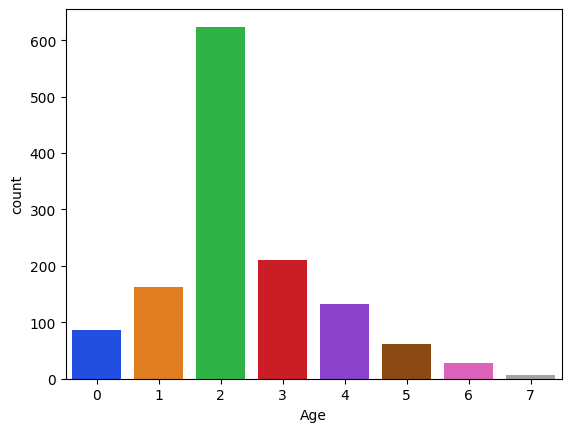

In [ ]:
### 탑승객 연령 분포 시각화

"""
색상 관련 공식 링크: https://seaborn.pydata.org/tutorial/color_palettes.html
"""

### 탑승객 연령 분포 시각화
sns.countplot(data = df, x = "Age", palette = "bright")    ## 나이 구간별로 시각화
plt.show()

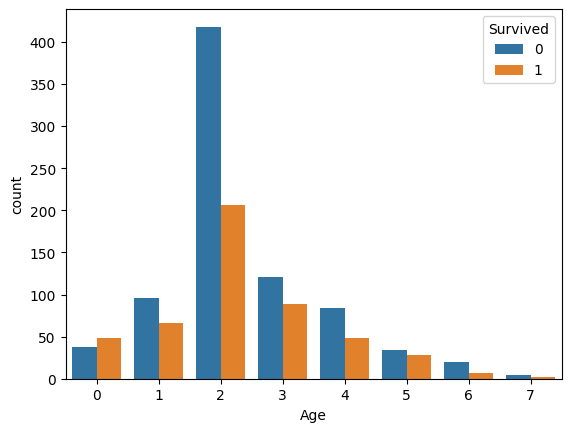

In [ ]:
### Survived 컬럼과 Age 컬럼의 관계 분석
sns.countplot(data = df, x = "Age", hue = "Survived")    ## 각 나잇대 구간별로 생존 여부가 어떻게 되는지
plt.show()

In [ ]:
### 10대 / 20대 / 30대 생존 여부에 대한 통계 분석

## 10대의 생존 여부에 대한 통계 분석

# 빈도수
condition1 = df.loc[:, "Age"] == 1    ## 구간화 해서 10대만 뽑으려면 Age 값이 1이랑 같으면 됨
age10_survived_counts = df.loc[condition1, "Survived"].value_counts()   ##10대들의 생존여부 빈도수 추출
print(f"10대 중 사망자 / 생존자 수 : \n{age10_survived_counts}")

print("-" * 80)

# 비율
age10_survived_ratio = df.loc[condition1, "Survived"].value_counts(normalize = True)  ## 빈도수 비율로 변환
print(f"10대 중 사망자 / 생존자 수 : \n{age10_survived_ratio}")

print("-" * 80)

## 20대의 생존 여부에 대한 통계 분석

# 빈도수
condition2 = df.loc[:, "Age"] == 2
age20_survived_counts = df.loc[condition2, "Survived"].value_counts()
print(f"20대 중 사망자 / 생존자 수 : \n{age20_survived_counts}")

print("-" * 80)

# 비율
age20_survived_ratio = df.loc[condition2, "Survived"].value_counts(normalize = True)  ## 빈도수 비율로 변환
print(f"20대 중 사망자 / 생존자 수 : \n{age20_survived_ratio}")

print("-" * 80)

## 30대의 생존 여부에 대한 통계 분석

# 빈도수
condition3 = df.loc[:, "Age"] == 3
age30_survived_counts = df.loc[condition3, "Survived"].value_counts()
print(f"30대 중 사망자 / 생존자 수 : \n{age30_survived_counts}")

print("-" * 80)

# 비율
age30_survived_ratio = df.loc[condition3, "Survived"].value_counts(normalize = True)  ## 빈도수 비율로 변환
print(f"30대 중 사망자 / 생존자 수 : \n{age30_survived_ratio}")

10대 중 사망자 / 생존자 수 : 
Survived
0    96
1    66
Name: count, dtype: int64
--------------------------------------------------------------------------------
10대 중 사망자 / 생존자 수 : 
Survived
0    0.592593
1    0.407407
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
20대 중 사망자 / 생존자 수 : 
Survived
0    418
1    206
Name: count, dtype: int64
--------------------------------------------------------------------------------
20대 중 사망자 / 생존자 수 : 
Survived
0    0.669872
1    0.330128
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
30대 중 사망자 / 생존자 수 : 
Survived
0    121
1     89
Name: count, dtype: int64
--------------------------------------------------------------------------------
30대 중 사망자 / 생존자 수 : 
Survived
0    0.57619
1    0.42381
Name: proportion, dtype: float64


#### 성별과 연령의 관계 분석

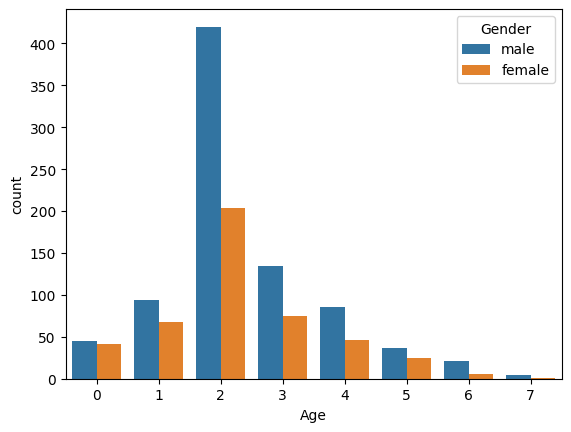

In [ ]:
### Gender 컬럼과 Age 컬럼의 관계 분석
sns.countplot(data = df, x = "Age", hue = "Gender")   ## 연령대별로 남녀 비율을 분석
plt.show()

In [ ]:
### 20대의 성별에 대한 통계 분석 (가장 많이 죽은 나잇대)

# 빈도수 분석
condition1 = df.loc[:, "Age"] == 2   ## Age 나잇대가 20대를 만족하는 row 만 추출
counts = df.loc[condition1, "Gender"].value_counts()
print(f"20대 중 남녀의 빈도수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[condition1, "Gender"].value_counts(normalize = True)
print(f"20대 중 남녀의 비율 : \n{ratio}")

## 결과 분석 : 20대 남성이 집중적으로 많이 죽었다.


20대 중 남녀의 빈도수 : 
Gender
male      420
female    204
Name: count, dtype: int64
--------------------------------------------------------------------------------
20대 중 남녀의 비율 : 
Gender
male      0.673077
female    0.326923
Name: proportion, dtype: float64


In [ ]:
### 30대의 성별에 대한 통계 분석 (가장 많이 죽은 나잇대)

# 빈도수 분석
condition2 = df.loc[:, "Age"] == 3
counts = df.loc[condition2, "Gender"].value_counts()
print(f"30대 중 남녀의 빈도수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[condition2, "Gender"].value_counts(normalize = True)
print(f"30대 중 남녀의 비율 : \n{ratio}")

## 결과 : 20대보다 30대가 상대적으로 사망률이 더 낮고 생존률이 더 상대적으로 높다.
## 그 이유 중에 하나는 인구 빈도 상 남성이 더 많고 여성이 적다.

30대 중 남녀의 빈도수 : 
Gender
male      135
female     75
Name: count, dtype: int64
--------------------------------------------------------------------------------
30대 중 남녀의 비율 : 
Gender
male      0.642857
female    0.357143
Name: proportion, dtype: float64


In [ ]:
### 10대의 성별에 대한 통계 분석

# 빈도수 분석
condition3 = df.loc[:, "Age"] == 1
counts = df.loc[condition3, "Gender"].value_counts()
print(f"10대 중 남녀의 빈도수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[condition3, "Survived"].value_counts(normalize = True)
print(f"10대 중 남녀의 비율: \n{ratio}")


### 결과 : 10대에 있어서는 남자와 여자의 셩별 외로 다른 요인이 사망률에 작용했다. 10대는 30대에 비해서 남성의 비율이 더 낮고 여성의 비율이 더 높지만,
## 사망률이 더 높았다.
## 성별로 해석이 안되고 다른 요인이 있다.


10대 중 남녀의 빈도수 : 
Gender
male      94
female    68
Name: count, dtype: int64
--------------------------------------------------------------------------------
10대 중 남녀의 비율: 
Survived
0    0.592593
1    0.407407
Name: proportion, dtype: float64


In [ ]:
### 20대 남성의 생존 여부 통계 분석

# 빈도수 분석
condition = (df.loc[:, "Age"] == 2) & (df.loc[:, "Gender"] == "male")   ## 20대이자 남성이여야 되는 두가지 조건을 동시에 만족
counts = df.loc[condition, "Survived"].value_counts()
print(f"20대 남성의 사망자 / 생존자 수 : \n{counts}")

## 결과 : 381명이 사망, 39명이 생존. 남성 대략 420 명중에서 381명이 사망.

print("-" * 80)

# 비율 분석
ratio = df.loc[condition, "Survived"].value_counts(normalize = True)
print(f"20대 남성의 사망자 / 생존자 비율 : \n{ratio}")

## 결과: 비율로 바꾸면 20대 남성이 90.7%가 사망. => 압도적으로 높은 사망 비율

20대 남성의 사망자 / 생존자 수 : 
Survived
0    381
1     39
Name: count, dtype: int64
--------------------------------------------------------------------------------
20대 남성의 사망자 / 생존자 비율 : 
Survived
0    0.907143
1    0.092857
Name: proportion, dtype: float64


In [ ]:
### 20대 여성의 생존 여부 통계 분석

# 빈도수 분석
condition = (df.loc[:, "Age"] == 2) & (df.loc[:, "Gender"] == "female")   ## 20대이자 여성이여야 되는 두가지 조건을 동시에 만족
counts = df.loc[condition, "Survived"].value_counts()
print(f"20대 여성의 사망자 / 생존자 수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[condition, "Survived"].value_counts(normalize = True)
print(f"20대 여성의 사망자 / 생존자 비율 : \n{ratio}")

## 결과 : 같은 여성이래도 20대 여성은 사망 비율이 더 올라갔음 전체적인 데이터로 따졌을때.
## => 20대는 남녀 전체적으로 다른 나잇대 남녀보다 더 사망 비율이 높음


20대 여성의 사망자 / 생존자 수 : 
Survived
1    167
0     37
Name: count, dtype: int64
--------------------------------------------------------------------------------
20대 여성의 사망자 / 생존자 비율 : 
Survived
1    0.818627
0    0.181373
Name: proportion, dtype: float64


#### 생존 여부와 요금의 관계 분석

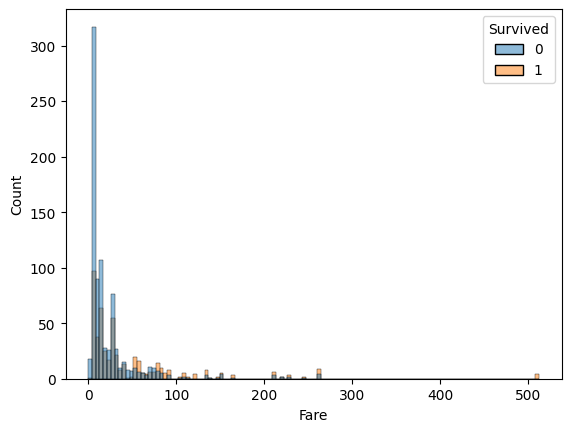

In [ ]:
### Fare 컬럼의 요금 분포 시각화
sns.histplot(data = df, x = "Fare", hue = "Survived")
plt.show()


## 결과 : 이렇게만 보면 생존 분포도가 Fare에 양방향으로 비슷하게 되어있기 때문에 이 그래프로는 결론을 도출하기 힘듬


##### Pclass 컬럼과 Fare 컬럼의 관계 분석

In [ ]:
### 상관관계 분석
## 컬럼들간의 상관관계를 분석
## 순서로 되어있는 어떤 범주 (순서가 상관있는 경우) -> spearman correlation으로 분석 (디폴트는 perason)
corr_matrix = df.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare", "num_family"]].corr(method = "spearman")
print(corr_matrix)

## 결과 : 요금 (Fare(과 가장 관련성이 높은게 Pclass, num_family도 관련이 높다
### 음수의 상관관계는 변화의 방향성이다. 하나의 변수가 증가하면 다른 변수도 증가하는지


              Pclass       Age     SibSp     Parch      Fare  num_family
Pclass      1.000000 -0.358715 -0.066679 -0.028752 -0.709079   -0.089363
Age        -0.358715  1.000000 -0.109873 -0.183359  0.173916   -0.137568
SibSp      -0.066679 -0.109873  1.000000  0.438373  0.445877    0.848278
Parch      -0.028752 -0.183359  0.438373  1.000000  0.400516    0.795863
Fare       -0.709079  0.173916  0.445877  0.400516  1.000000    0.521539
num_family -0.089363 -0.137568  0.848278  0.795863  0.521539    1.000000


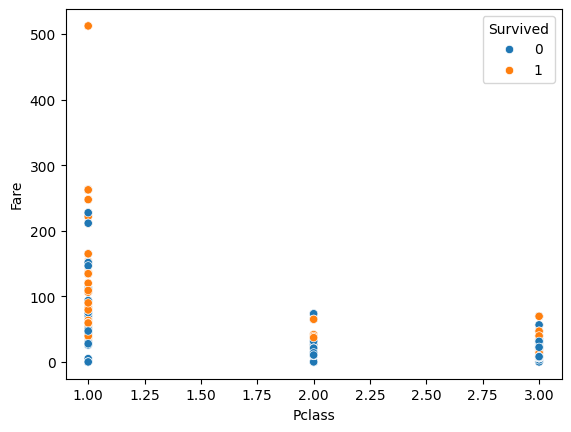

In [ ]:
# 좌석 등급이 높아질수록 요금이 비싸질 것 같으니 관계 분석

### 시각화 --> scatterplot 분석
sns.scatterplot(data = df, x = "Pclass", y = "Fare", hue = "Survived")
plt.show()

## 결과 : 2등석과 3등석의 요금은 큰 차이가 안남. (최댓값으로 봐도) -> 반면에 1등급은 낮은 가격부터 높은 가격까지 골구로 분포

In [ ]:
### 2등석, 3등석 요금의 최대값 추출 (둘이 크게 차이가 안남)

# 2등석 요금의 최대값 추출
condition1 = df.loc[:, "Pclass"] == 2   ## 2등석만 만족하는 row True
pclass2_fare_max = df.loc[condition1, "Fare"].max()        ## 그 중에 최대값이 어떤지 (해당 콜롬의 최대값 (Series에 대한 max() 함수))
print(f"2등석 요금의 최대값 : \n{pclass2_fare_max}")

print("-" * 80)

# 3등석 요금의 최대값 추출
condition2 = df.loc[:, "Pclass"] == 3   ## 3등석만 만족하는 row True
pclass3_fare_max = df.loc[condition2, "Fare"].max()        ## 그 중에 최대값이 어떤지 (해당 콜롬의 최대값 (Series에 대한 max() 함수))
print(f"3등석 요금의 최대값 : \n{pclass3_fare_max}")


2등석 요금의 최대값 : 
73.5
--------------------------------------------------------------------------------
3등석 요금의 최대값 : 
69.55


In [ ]:
### 요금이 73.5 달러 (2등석 최대요금) 보다 큰 승객 --> 사망자 / 생존자 통계 분석

# 빈도수 분석
condition = df.loc[:, "Fare"] > pclass2_fare_max    # (요금이 73.5 달러보다 큰 행만 추출)
counts = df.loc[condition, "Survived"].value_counts()  # 73.5 (기준금액) 보다 큰 금액을 지불한 사람들의 생존과 사망 빈도
## value_counts()가 모든 행의 결과를 다 더함 저 조건에 만족하는걸
print(f"요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[condition, "Survived"].value_counts(normalize = True)
print(f"요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 비율 : \n{ratio}")

## 1등석 승객중에서도 73.5 달러보다 큰 금액을 지불한 승객의 생존률이 훨씬 그냥 1등석 전체의 생존 비율보다 높음


요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 수 : 
Survived
1    101
0     44
Name: count, dtype: int64
--------------------------------------------------------------------------------
요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 비율 : 
Survived
1    0.696552
0    0.303448
Name: proportion, dtype: float64


In [ ]:
### 요금이 69.55 달러 (3등석 최대요금) 보다 큰 승객 --> 사망자 / 생존자 통계 분석

# 빈도수 분석
condition = df.loc[:, "Fare"] > pclass3_fare_max
counts = df.loc[condition, "Survived"].value_counts()
print(f"요금이 69.55 달러보다 큰 승객의 사망자 / 생존자 수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[condition, "Survived"].value_counts(normalize = True)
print(f"요금이 69.55 달러보다 큰 승객의 사망자 / 생존자 비율 : \n{ratio}")

## 1등석 승객중에서도 73.5 달러보다 큰 금액을 지불한 승객의 생존률이 훨씬 그냥 1등석 전체의 생존 비율보다 높음


요금이 69.55 달러보다 큰 승객의 사망자 / 생존자 수 : 
Survived
1    103
0     53
Name: count, dtype: int64
--------------------------------------------------------------------------------
요금이 69.55 달러보다 큰 승객의 사망자 / 생존자 비율 : 
Survived
1    0.660256
0    0.339744
Name: proportion, dtype: float64


#### 생존 여부와 가족 인원수의 관계 분석

In [ ]:
### 탑승객의 가족 인원수 컬럼 분포 통계 분석

# 빈도수 분석
counts = df.loc[:, "num_family"].value_counts()
print(f"탑승객의 가족 인원수 별 빈도수 : \n{counts}")

## 혼자 탄 사람이 전체의 50%를 넘어감 (나머지는 다 합쳐도 50%도 안됨)

print("-" * 80)

# 비율 분석
ratio = df.loc[:, "num_family"].value_counts(normalize = True)
print(f"탑승객의 가족 인원수 별 빈도수 : \n{ratio}")

## 혼자 탄 사람이 60%, 나머지가 40%


탑승객의 가족 인원수 별 빈도수 : 
num_family
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64
--------------------------------------------------------------------------------
탑승객의 가족 인원수 별 빈도수 : 
num_family
0     0.603514
1     0.179526
2     0.121467
3     0.032850
5     0.019099
4     0.016807
6     0.012223
10    0.008403
7     0.006112
Name: proportion, dtype: float64


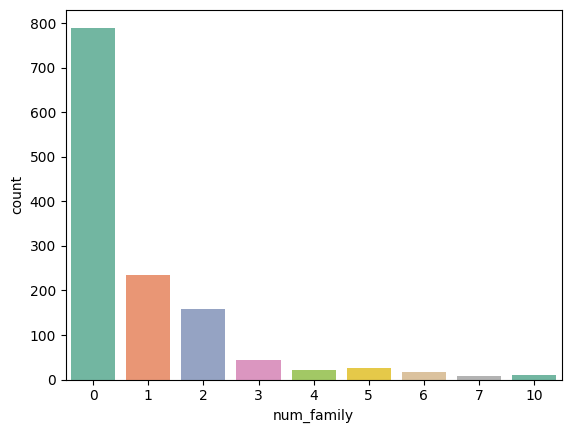

In [ ]:
### 탑승객의 가족 인원수 컬럼 분포 시각화
sns.countplot(data = df, x = "num_family", palette = "Set2")    ## 빈도수는 막대 그래프로 시각화 하면 보기 편함
plt.show()


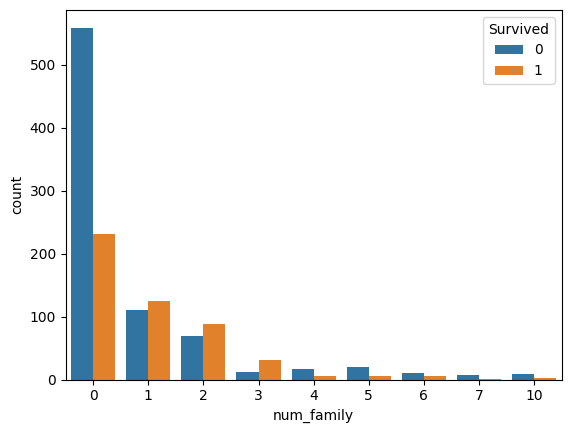

In [ ]:
### Survived 컬럼과 num_family 컬럼의 관계 시각화  (0부터 10명까지 구간화)
sns.countplot(data = df, x = "num_family", hue = "Survived")   ## 생존여부별로 쪼갠다
plt.show()

## 동반간 가족인원이 1명, 2명, 3명까지는 생존률이 사망률보다 높았지만, 4명 이상부터는 급격하게 줄어든다 (사망률 > 생존률)

In [ ]:
### 생존 여부와 가족 인원수 분포 통계 분석

# 대상 : 가족 인원수 = 0 --> 사망자 / 생존자 비율
condition1 = (df.loc[:, "num_family"] == 0)
num0_ratio = df.loc[condition1, "Survived"].value_counts(normalize = True)    ## 가족 인원수가 0명인 행만 뽑아서 생존/사망 비율 분석
print(f"동반 가족 인원수가 0인 경우 사망자 / 생존자 비율 : \n{num0_ratio}")

## 결과는 70 (사망) : 30 (생존) => 2배 넘게 차이남 : 혼자 탄 사람은 많이 죽었다 (인원수로 봐도 그렇고 비율로 봐도 그렇다)

print("-" * 80)

# 대상 : 가족 인원수 = 1 --> 사망자 / 생존자 비율
condition2 = (df.loc[:, "num_family"] == 1)
num1_ratio = df.loc[condition2, "Survived"].value_counts(normalize = True)
print(f"동반 가족 인원수가 1인 경우 사망자 / 생존자 비율 : \n{num1_ratio}")

## 결과는 53 (생존) : 47 (사망) => 생존률이 더 높았음  : 혼자 탄 사람보다는 생존률이 더 올라갔음

print("-" * 80)

# 대상 : 가족 인원수 = 2 --> 사망자 / 생존자 비율
condition3 = (df.loc[:, "num_family"] == 2)
num2_ratio = df.loc[condition3, "Survived"].value_counts(normalize = True)
print(f"동반 가족 인원수가 2인 경우 사망자 / 생존자 비율 : \n{num2_ratio}")

## 결과가 더 올라갔음: 56 (생존) : 44 (사망) => 생존률이 좀 더 올라갔음

print("-" * 80)

# 대상 : 가족 인원수 = 3 --> 사망자 / 생존자 비율
condition4 = (df.loc[:, "num_family"] == 3)
num3_ratio = df.loc[condition4, "Survived"].value_counts(normalize = True)
print(f"동반 가족 인원수가 3인 경우 사망자 / 생존자 비율 : \n{num3_ratio}")


## 결과가 훨씬 더 올라갔음 : 72 (생존) : 27 (사망) => 생존률이 훨씬 올라감

print("-" * 80)

# 대상 : 가족 인원수 = 4 --> 사망자 / 생존자 비율
condition5 = (df.loc[:, "num_family"] == 4)
num4_ratio = df.loc[condition5, "Survived"].value_counts(normalize = True)
print(f"동반 가족 인원수가 4인 경우 사망자 / 생존자 비율 : \n{num4_ratio}")

## 결과가 갑자기 훨씬 내려갔음 : 77 (사망) : 23 (사망) ==> 생존률이 72에서 23으로 떨어짐
### 추정 되는 이유로는 일가족을 다 이끌고 같이 살기는 쉽지 않았을것이다



동반 가족 인원수가 0인 경우 사망자 / 생존자 비율 : 
Survived
0    0.707595
1    0.292405
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 1인 경우 사망자 / 생존자 비율 : 
Survived
1    0.531915
0    0.468085
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 2인 경우 사망자 / 생존자 비율 : 
Survived
1    0.559748
0    0.440252
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 3인 경우 사망자 / 생존자 비율 : 
Survived
1    0.72093
0    0.27907
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 4인 경우 사망자 / 생존자 비율 : 
Survived
0    0.772727
1    0.227273
Name: proportion, dtype: float64


#### 생존 여부와 호칭의 관계 분석

In [ ]:
#### 호칭의 분포 통계 분석

# 빈도수 분석
counts = df.loc[:, "title"].value_counts()   ## 호칭의 항목별 빈도수를 구함 (성별을 반영하고 있음 )
print(f"호칭의 항목별 빈도수 : \n{counts}")

print("-" * 80)

# 비율 분석
ratio = df.loc[:, "title"].value_counts(normalize = True)
print(f"호칭의 항목별 빈도수 : \n{ratio}")

호칭의 항목별 빈도수 : 
title
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64
--------------------------------------------------------------------------------
호칭의 항목별 빈도수 : 
title
Mr        0.578304
Miss      0.198625
Mrs       0.150497
Master    0.046600
other     0.025974
Name: proportion, dtype: float64


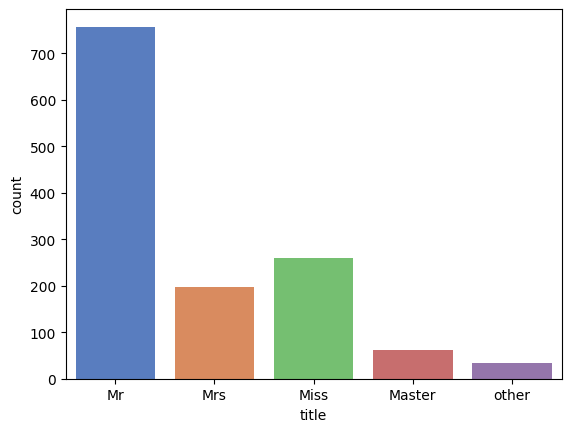

In [ ]:
### 호칭의 분포 시각화
## 항목별 빈도수니깐 -> countplot (막대 그래프)
sns.countplot(data = df, x = "title", palette = "muted")
plt.show()

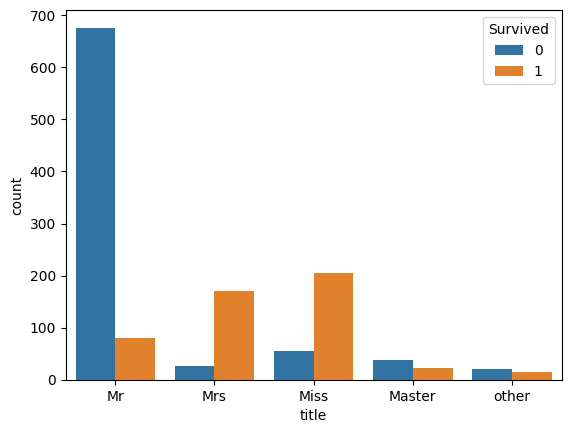

In [ ]:
### Survived 컬럼과 title 컬럼의 관계 분석
sns.countplot(data = df, x = "title", hue = "Survived")  ## 성별별로 생존/사망률 분석
plt.show()

In [ ]:
### 호칭별 생존 여부 통계 분석

# 대상 : Mr --> 사망자 / 생존자 비율
condition1 = (df.loc[:, "title"] == "Mr")     ## 호칭을 Mr.로 가지고 있는 사람들만 뽑음
mr_ratio = df.loc[condition1, "Survived"].value_counts(normalize = True)
print(f"Mr 중 사망자 / 생존자 비율 : \n{mr_ratio}")

## 결과: Mr.의 사망률은 남성의 평균 사망률인 87.1%보다 높은 89.3% (Mr.호칭을 가지고 있는 다른 호칭을 가진 남성들보다 더 많이 죽었다)

print("-" * 80)

# 대상 : Mrs --> 사망자 / 생존자 비율
condition2 = (df.loc[:, "title"] == "Mrs")
mrs_ratio = df.loc[condition2, "Survived"].value_counts(normalize = True)
print(f"Mrs 중 사망자 / 생존자 비율 : \n{mrs_ratio}")

## 결과 : Mrs.의 생존률은 86%. 일반 여성의 생존률은 82% 정도. Mrs. 호칭을 가진 여성들이 생존률이 더 높았다.

print("-" * 80)

# 대상 : Miss -> 사망자 / 생존자 비율
condition3 = (df.loc[:, "title"] == "Miss")
miss_ratio = df.loc[condition3, "Survived"].value_counts(normalize = True)
print(f"Miss 중 사망자 / 생존자 비율 : \n{miss_ratio}")

## 결과 : 여성 평균 생존률보다 4% 정도 떨어졌다.

print("-" * 80)

# 대상 : Master --> 사망자 / 생존자 비율
condition4 = (df.loc[:, "title"] == "Master")
master_ratio = df.loc[condition4, "Survived"].value_counts(normalize = True)
print(f"Master 중 사망자 / 생존자 비율 : \n{master_ratio}")

## 결과 : 남성 평균 사망률인 87% 보다 62.2%로 훨씬 낮아졌다.


Mr 중 사망자 / 생존자 비율 : 
Survived
0    0.892999
1    0.107001
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Mrs 중 사망자 / 생존자 비율 : 
Survived
1    0.86802
0    0.13198
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Miss 중 사망자 / 생존자 비율 : 
Survived
1    0.788462
0    0.211538
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Master 중 사망자 / 생존자 비율 : 
Survived
0    0.622951
1    0.377049
Name: proportion, dtype: float64


##### 연령과 호칭의 관계 분석

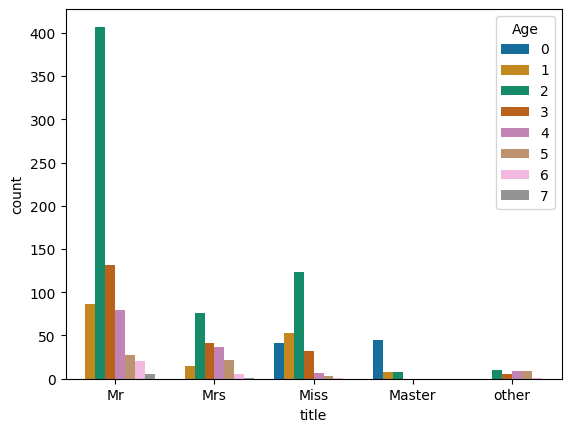

In [ ]:
### Age 컬럼과 title 컬럼의 관계 분석
sns.countplot(data = df, x = "title", hue = "Age", palette = "colorblind")
plt.show()

## 결과 : Mr.에는 20대가 압도적으로 많다 -> 30대 -> 10대 / Master에는 10대 이하가 다 포함되어 있다 (어리니깐 보호 받아서 살았을 가능성이 크다)
# 연령의 구성별로 차이가 있다.

##### 승객의 등급과 호칭의 관계 분석

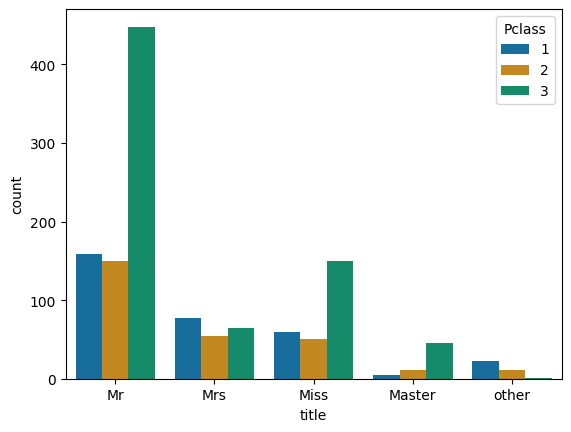

In [ ]:
### Pclass 컬럼과 title 컬럼의 관계 분석
sns.countplot(data = df, x = "title", hue = "Pclass", palette = "colorblind")
plt.show()

## Mr이 3등석이 압도적으로 훨씬 많다 / Master는 3등석이 더 많았어서 / Miss보단 Mrs가 1등석이 더 많아서 생존률이 더 평균적으로 높았다